In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import cPickle
import matplotlib.pyplot as plt
import os

load_data = 1

In [17]:
from scipy.interpolate import pchip_interpolate

def jump_stitcher_anyMetric(incorrectVar, plot_flag):
## inputs corresponds to vectors of kinematic data for a given trajectory; fps is the number of frames acquired per second

    incorrectVar_diff = np.diff(incorrectVar)
    if incorrectVar_diff.size:
        diff_cutoff = np.percentile(incorrectVar_diff, 99)*10;

        out_of_bound_max_cutoff = np.percentile(incorrectVar,99)+(np.percentile(incorrectVar,99)-np.percentile(incorrectVar,1))/2
        out_of_bound_min_cutoff = np.percentile(incorrectVar,1)-(np.percentile(incorrectVar,99)-np.percentile(incorrectVar,1))/2

        out_of_bound_index = np.where((incorrectVar>out_of_bound_max_cutoff) | (incorrectVar<out_of_bound_min_cutoff))
        out_of_bound_index = np.asarray(out_of_bound_index).flatten()
        discontinuity_index = np.array([-1])

        for i in range(0, len(incorrectVar_diff)):
            if np.abs(incorrectVar_diff[i]) > diff_cutoff:
                discontinuity_index = [discontinuity_index, (i-1), i, (i+1)]

        discontinuity_index = np.unique(discontinuity_index[discontinuity_index > 0])

        incorrectVar_nan = incorrectVar
        incorrectVar_nan[np.union1d(out_of_bound_index,discontinuity_index)] = np.nan
        correctedVar = pchip_interpolate(np.arange(0, len(incorrectVar_nan)), 
                                         incorrectVar_nan, np.arange(0,len(incorrectVar_nan)))

        if plot_flag == 1:
            fig = plt.figure(figsize=(15, 8))
            plt.plot(np.arange(0, len(incorrectVar_nan[1000:1300])), incorrectVar_nan[1000:1300], color='k')
            plt.plot(np.arange(0, len(correctedVar[1000:1300])), 2+correctedVar[1000:1300], 'r')
            plt.show()
    else:
        correctedVar = incorrectVar

    return correctedVar

In [18]:
if load_data > 0:
    data_dir = '/Volumes/GoogleDrive/My Drive/CRG_Dropbox/AljoComputer/Matlab/high_res_tracker/Data/20180316_OK6_CsChrimson_Tail_200micron/XML'
    with open(os.path.join(data_dir, 'kinData_xml.pkl'), 'rb') as read_file:
        kin_data = cPickle.load(read_file)

In [19]:
start_frame = 0
end_frame = 33000
all_tail_speed = np.asarray([np.asarray(larvaData['kinetics'].tailSpeed.values[start_frame:end_frame], dtype=np.float16) for larvaData in kin_data])

In [20]:
## Time per frame in s
tf = 0.008
total_time = np.arange(start_frame,end_frame)*tf

mean_tail_speed = np.mean(all_tail_speed, axis=0)

stimulus = kin_data[1]['stimulus']['intensity'][start_frame:end_frame]

In [26]:
from bokeh.layouts import gridplot, column
from bokeh.plotting import figure, show, output_file

window_size = 60
window = np.ones(window_size)/float(window_size)

def smoothen(dat, window):
    dat_filt = np.convolve(dat, window, mode='same')
    return dat_filt
    
all_tail_speed_filtered = []
for row in all_tail_speed:
    row_filt = jump_stitcher_anyMetric(row, 0)
    row_filt = smoothen(row_filt, window)
    all_tail_speed_filtered.append(row_filt)

all_tail_speed_filtered = np.asarray(all_tail_speed_filtered)
mean_tail_speed_filtered = np.nanmean(all_tail_speed_filtered, axis=0)

/Users/ajinkyadeogade/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


In [27]:
p1 = figure(x_axis_type="linear", title="Mean Tail Speed", plot_width=1200, plot_height=600)
p1.grid.grid_line_alpha=0.3
# Setting the second y axis range name and range
p1.extra_y_ranges = {"Stimulus": Range1d(start=0, end=50)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="Stimulus (W/m^2)"), 'right')

p1.xaxis.axis_label = 'Time (sec)'
p1.yaxis.axis_label = 'Tail speed (mm/sec)'
p1.line(total_time, mean_tail_speed_filtered, legend='mean tail speed', color='navy')
p1.line(total_time, stimulus, legend='stimulus', color='red')
p1.legend.location = "top_left"

output_file("mean_tail_speed.html", title="meanTailSpeed")
show(p1)  # open a browser

# Setting the rect glyph params for the first graph. 
# Using the default y range and y axis here.           
s1.rect(df_j.timestamp, mids, w, spans, fill_color="#D5E1DD", line_color="black")

# Setting the rect glyph params for the second graph.
# Using the aditional y range named "foo" and "right" y axis here. 
s1.rect(df_j.timestamp, ad_bar_coord, w, bar_span, fill_color="#D5E1DD", color="green", y_range_name="foo")

In [23]:
from bokeh.models import Range1d

def createGraph(tm, ts, stim):
    p = figure(x_axis_type="linear", title="Mean Tail Speed", plot_width=1200, plot_height=200)
#     p.grid.grid_line_alpha=0.3
#     p.xaxis.axis_label = 'Time (sec)'
#     p.yaxis.axis_label = 'Tail speed (mm/sec)'
    p.line(tm, ts, legend='mean tail speed', color='navy')
    p.line(tm, stim, legend='stimulus', color='red')
#     p.x_range=Range1d(left, right)
    p.y_range=Range1d(0, 10)
#     p.legend.location = "top_left"
    return p

all_plots = []
for tail_speed in all_tail_speed_filtered:
    tmp = createGraph(total_time, tail_speed, stimulus)
    all_plots.append(tmp)

output_file("indv_tail_speed.html", title="indvTailSpeed")

show(column(all_plots))  # open a browser

In [24]:
all_tail_speed_filtered

array([[        nan,         nan,         nan, ...,  1.98710938,
         1.97900798,  1.97090658],
       [        nan,         nan,         nan, ...,  0.26950277,
         0.25138753,  0.2227417 ],
       [        nan,         nan,         nan, ...,  0.79407145,
         0.78388265,  0.77462158],
       ..., 
       [        nan,         nan,         nan, ...,  1.46761068,
         1.45480143,  1.43644206],
       [        nan,         nan,         nan, ...,  2.57517904,
         2.55553385,  2.14459635],
       [        nan,         nan,         nan, ...,  1.49709066,
         1.49709066,  1.22287191]])

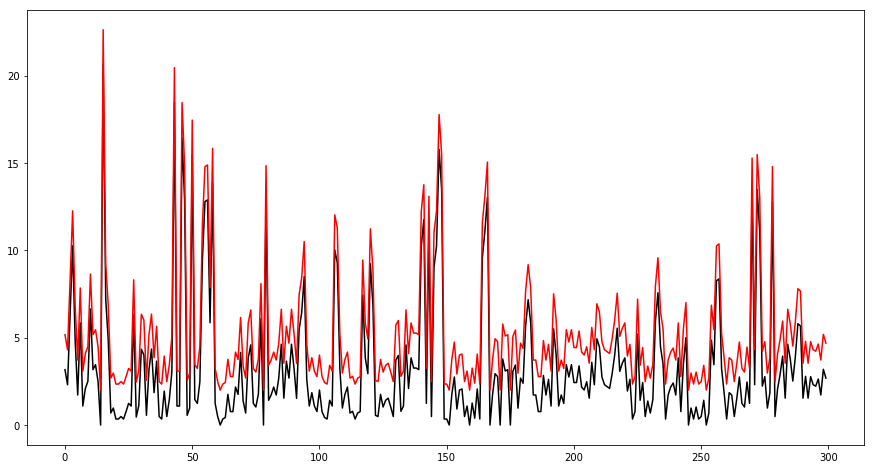

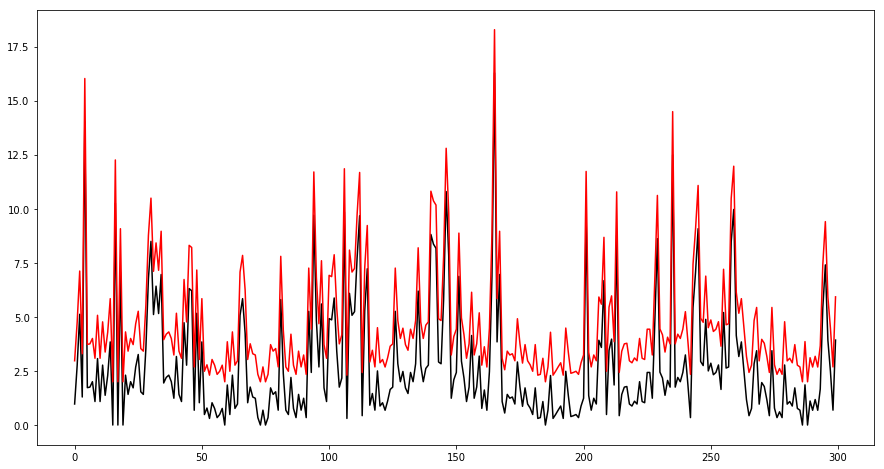

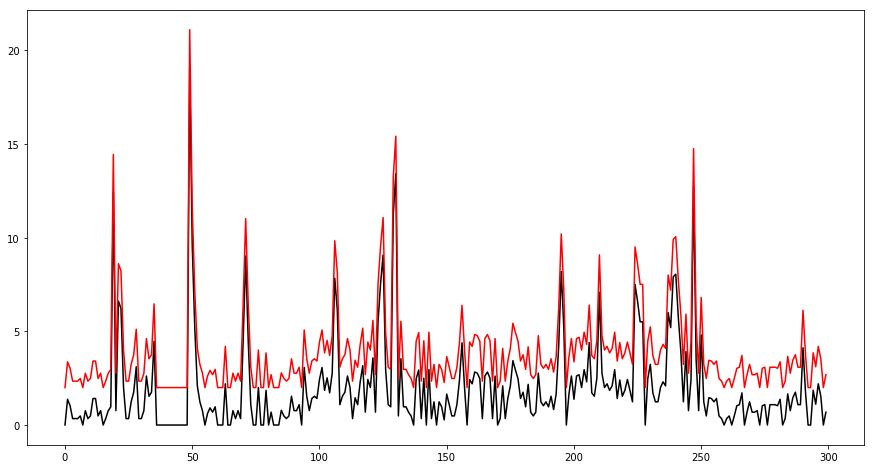

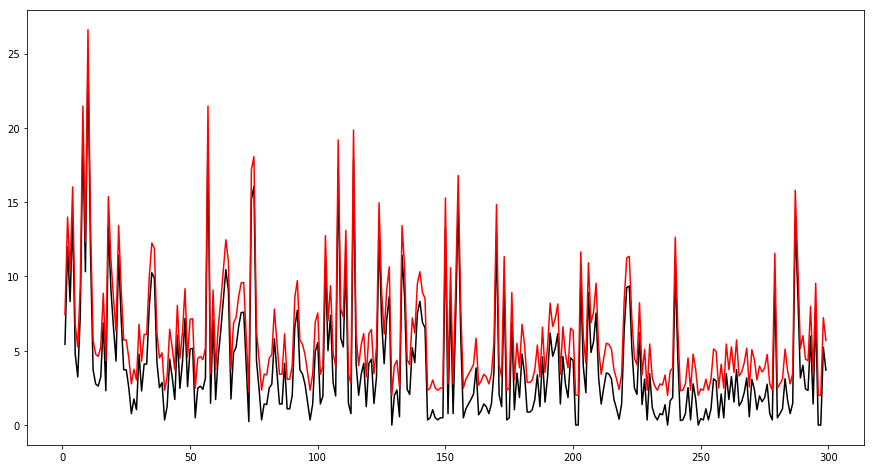

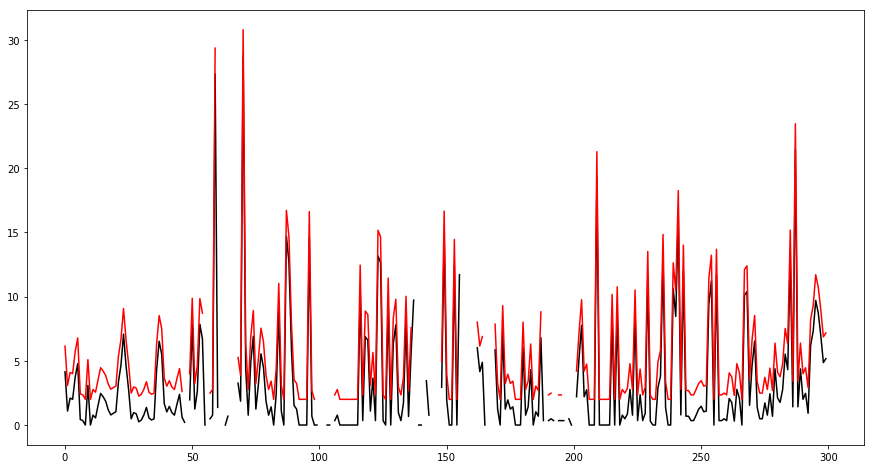

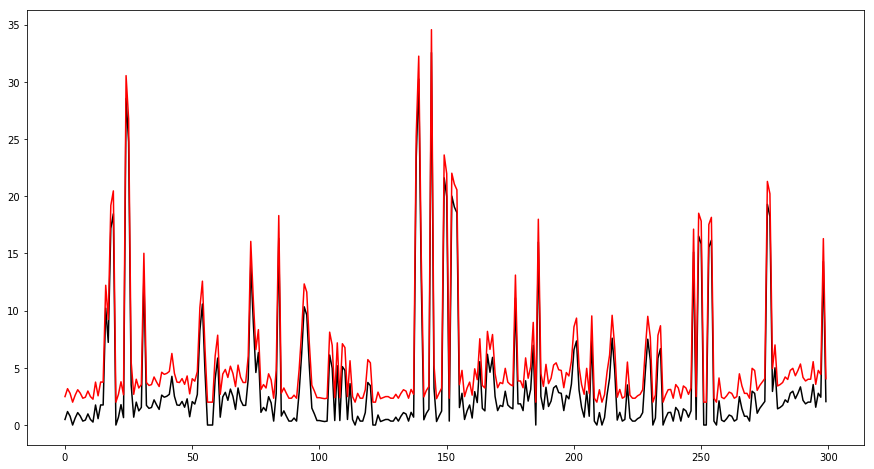

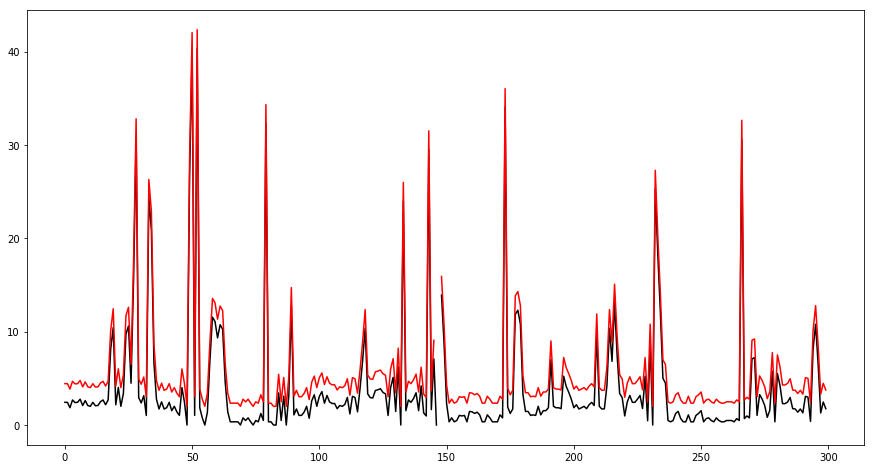

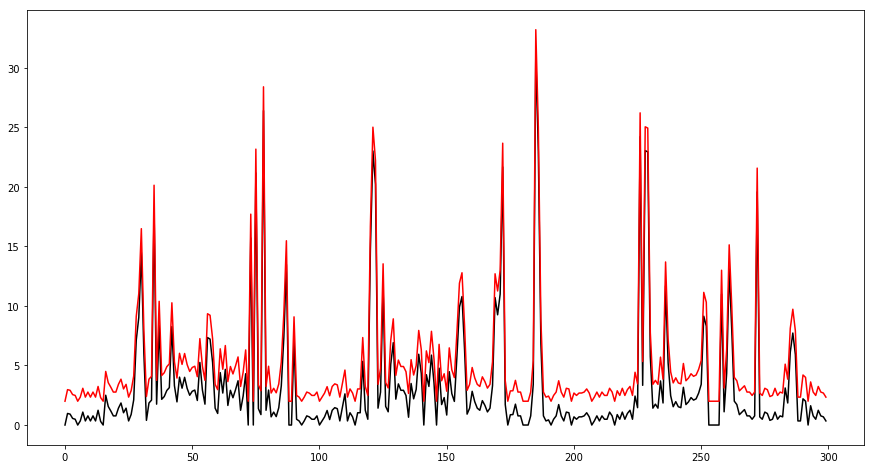

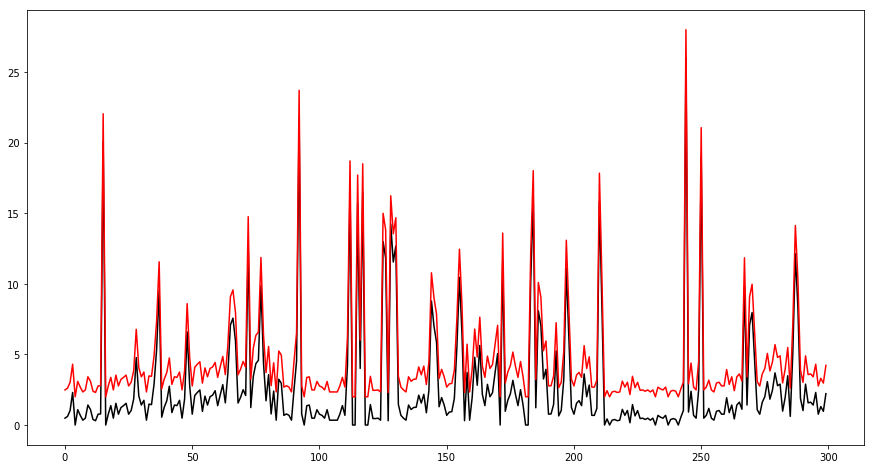

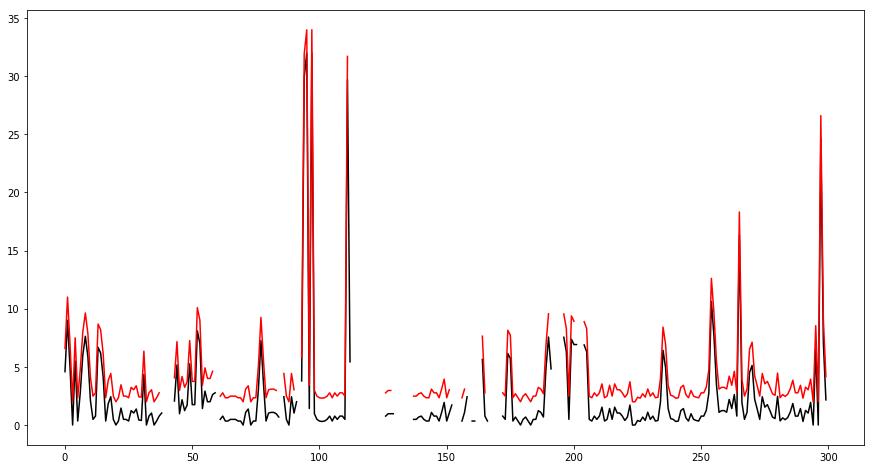

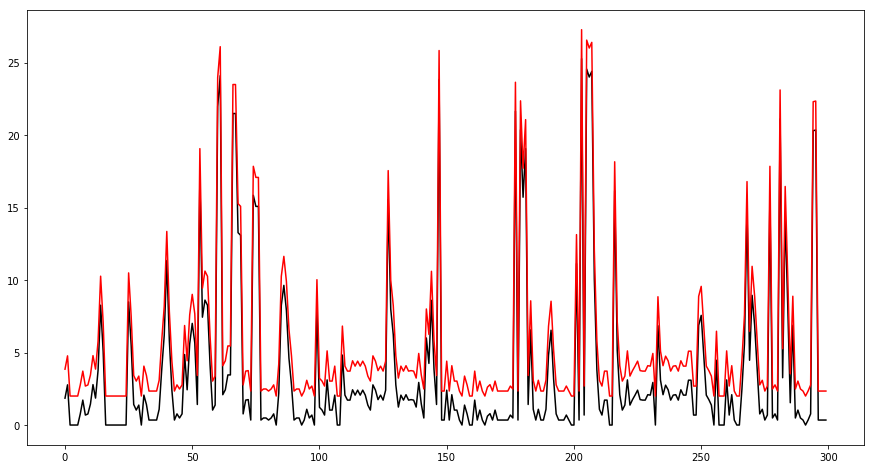

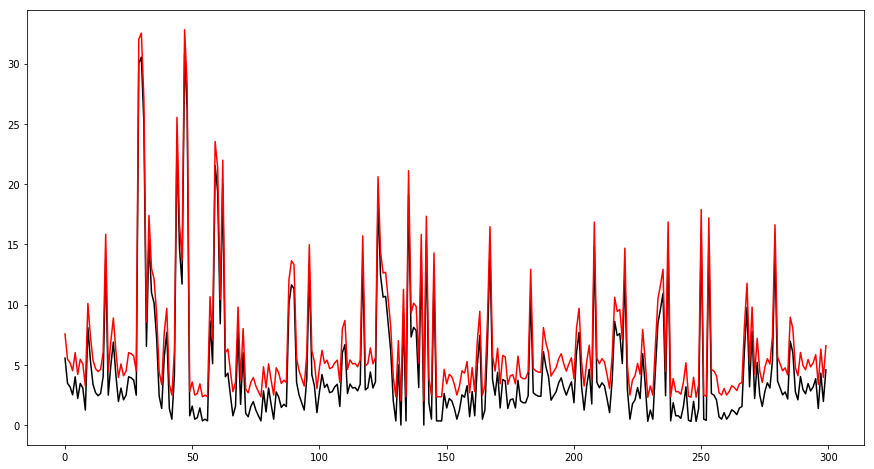

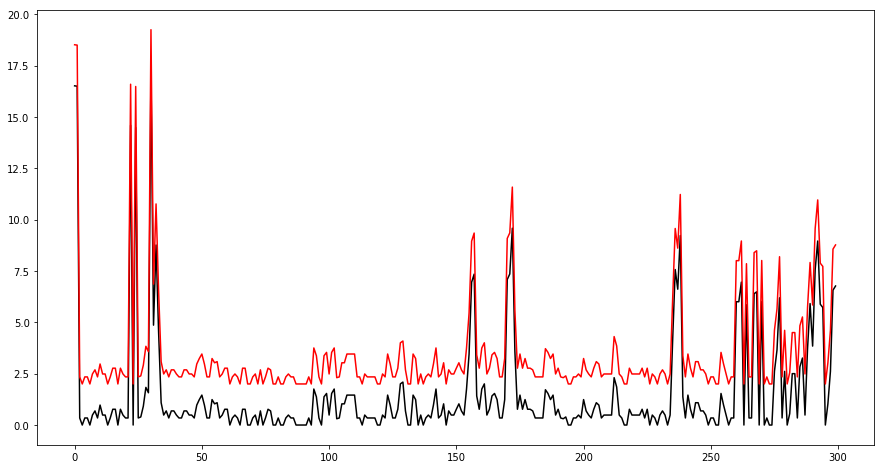

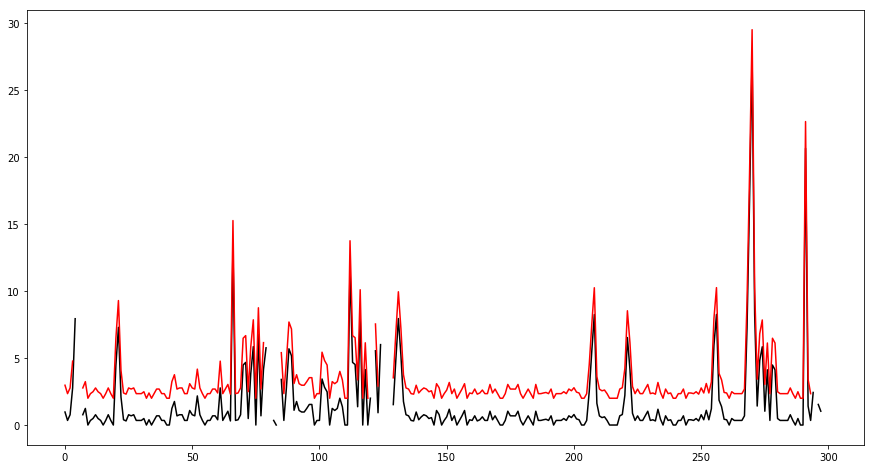

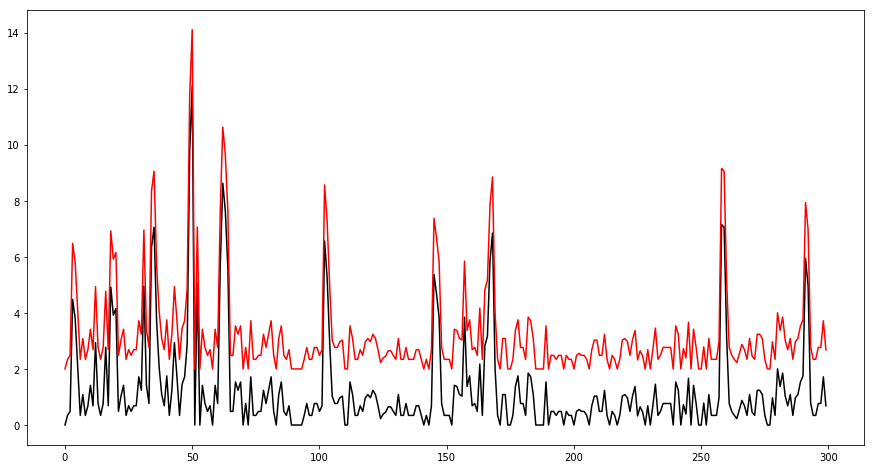

In [25]:
for row in all_tail_speed:
    row_filt = jump_stitcher_anyMetric(row, 1)

#     row_filt = smoothen(row_filt, window)
#     all_tail_speed_filtered.append(row_filt)